In [1]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from matplotlib import style
style.use("classic")
%matplotlib inline

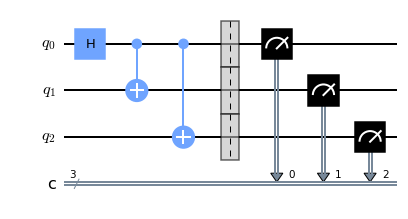

In [2]:
# Create a Quantum Circuit acting on a quantum register of two qubits and two bits
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw('mpl')

In [3]:
from qiskit import IBMQ
IBMQ.load_account()

configrc.store_credentials:WARNING:2022-05-09 12:48:02,703: Credentials already present. Set overwrite=True to overwrite.


In [10]:
provider = IBMQ.get_provider(hub="ibm-q")

simulated_qt_computers = []
real_qt_computers = []

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = -1
        
    
    if qubit_count == -1:
        simulated_qt_computers.append(f"{backend.name().ljust(30)} has {backend.status().pending_jobs:>2} queues")
    else:
        real_qt_computers.append(f"{backend.name().ljust(14)} has {backend.status().pending_jobs:>2} queues with {qubit_count:>2} qubits")


print ("Simulated quantum computers:")
for computer in simulated_qt_computers:
    print ("\t" + computer)
print ("\n")
print ("Real quantum computers:")
for computer in real_qt_computers:
    print ("\t" + computer)


Simulated quantum computers:
	ibmq_qasm_simulator            has  3 queues
	simulator_statevector          has  3 queues
	simulator_mps                  has  3 queues
	simulator_extended_stabilizer  has  3 queues
	simulator_stabilizer           has  3 queues


Real quantum computers:
	ibmq_armonk    has  8 queues with  1 qubits
	ibmq_santiago  has 40 queues with  5 qubits
	ibmq_bogota    has 23 queues with  5 qubits
	ibmq_lima      has 18 queues with  5 qubits
	ibmq_belem     has 24 queues with  5 qubits
	ibmq_quito     has  4 queues with  5 qubits
	ibmq_manila    has 30 queues with  5 qubits


In [8]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_belem")
job = q.execute(circ , backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


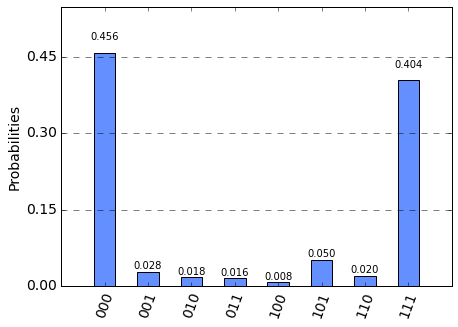

In [9]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circ)

plot_histogram([counts])

In [ ]:
from qiskit import Aer #simulator framework for qiskit

print ("All simulators:")
for backend in Aer.backends():
    print ("\t" + str(backend))

In [ ]:
sim_backend = Aer.get_backend("aer_simulator")

In [ ]:
job = q.execute(circ, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circ)

plot_histogram([counts])